In [7]:
# Import the necessary libraries
import pickle
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_log_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb

In [8]:
sns.set_style('darkgrid')

In [9]:
# Load the data into the dataframe
df = pd.read_csv("train.csv")

In [10]:
# checks the first 5 rows of the data
df.head(3)

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0


In [11]:
# checks for information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


In [12]:
df.describe()

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,216506.495284,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,187499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,562499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,749999.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


### **FEATURE** **ENGINEERING**

In [13]:
# Create BMI column
df['BMI'] = (df['Weight'] / (df['Height']/100)**2).round(2)

In [14]:
df.head(1)

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0,22.96


# **Exploratory Data Analysis**

<Axes: xlabel='Calories', ylabel='Count'>

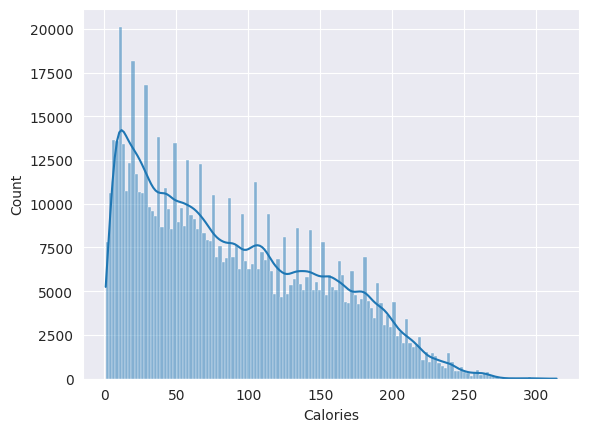

In [15]:
# Check the distribution of the Calory loss
sns.histplot(df['Calories'], kde=True)

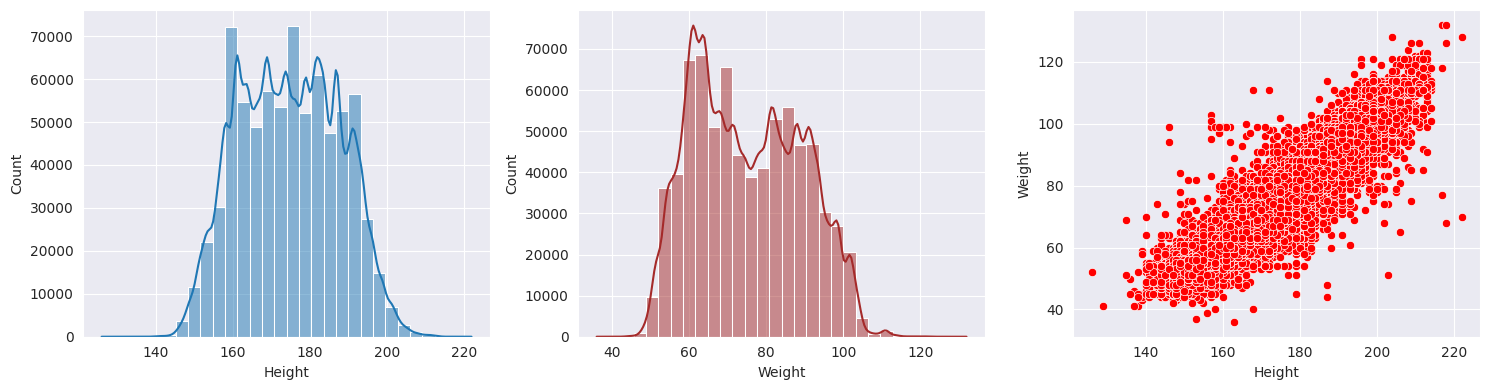

In [16]:
fig, axes = plt.subplots(1,3, figsize=(15,4))

sns.set_style('darkgrid')

sns.histplot(df['Height'], ax=axes[0], bins=30, kde=True)
sns.histplot(df['Weight'], ax=axes[1], bins=30, kde=True, color='brown')
sns.scatterplot(x='Height', y='Weight',ax=axes[2], data=df, color='red')
plt.tight_layout()

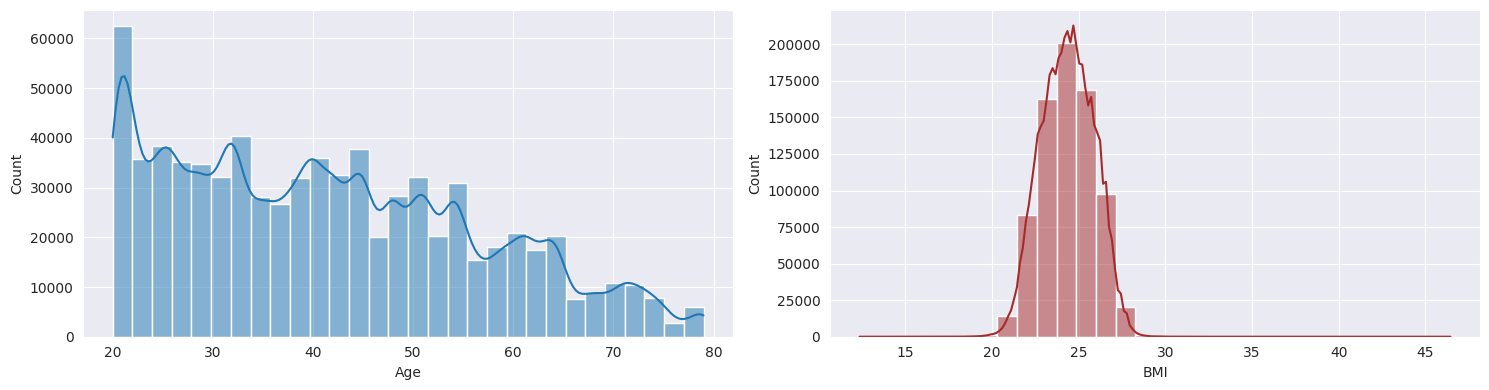

In [17]:
fig, axes = plt.subplots(1,2, figsize=(15,4))

sns.set_style('darkgrid')

sns.histplot(df['Age'], ax=axes[0], bins=30, kde=True)
sns.histplot(df['BMI'], ax=axes[1], bins=30, kde=True, color='brown')
plt.tight_layout()

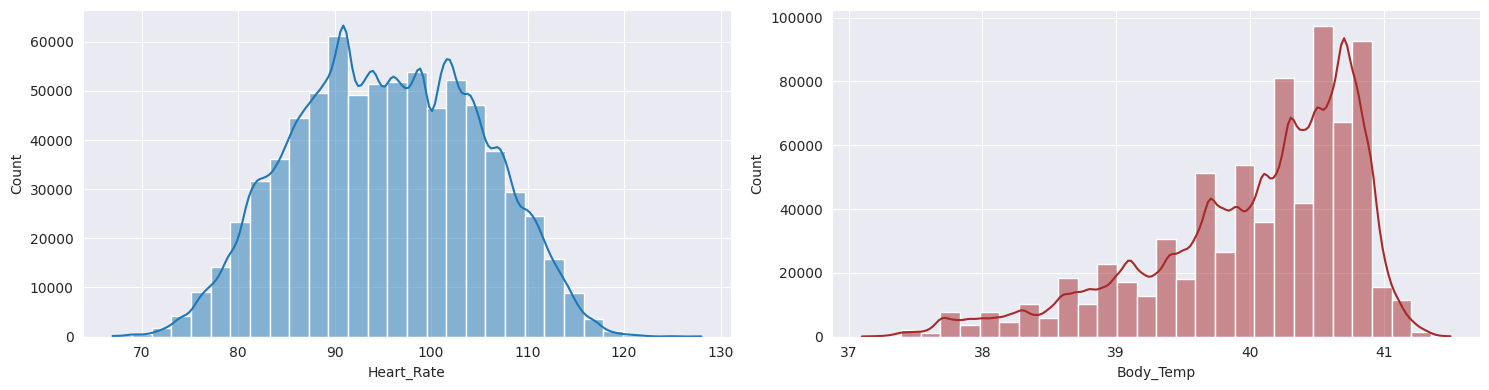

In [18]:
fig, axes = plt.subplots(1,2, figsize=(15,4))

sns.set_style('darkgrid')

sns.histplot(df['Heart_Rate'], ax=axes[0], bins=30, kde=True)
sns.histplot(df['Body_Temp'], ax=axes[1], bins=30, kde=True, color='brown')
plt.tight_layout()

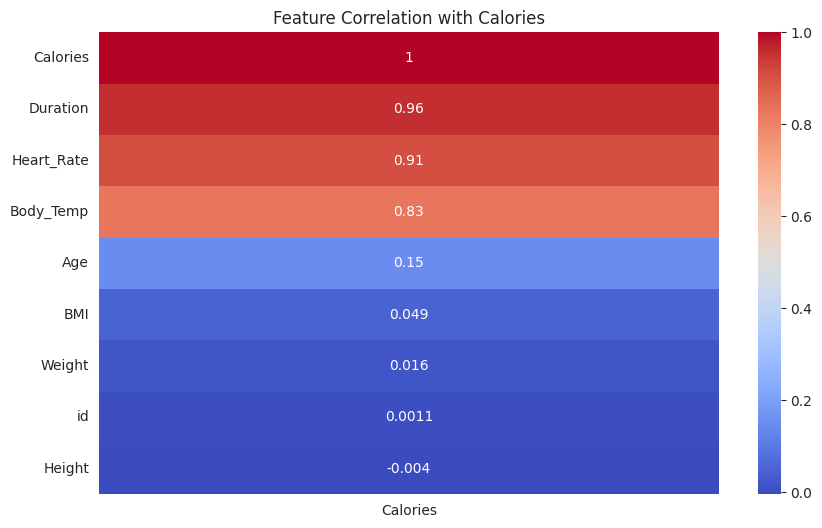

In [19]:
# Plot a correlation plot for the numerical columns

corr = df.corr(numeric_only=True)  # Only numeric columns

plt.figure(figsize=(10, 6))
sns.heatmap(corr[['Calories']].sort_values(by='Calories', ascending=False), annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Calories")
plt.show()


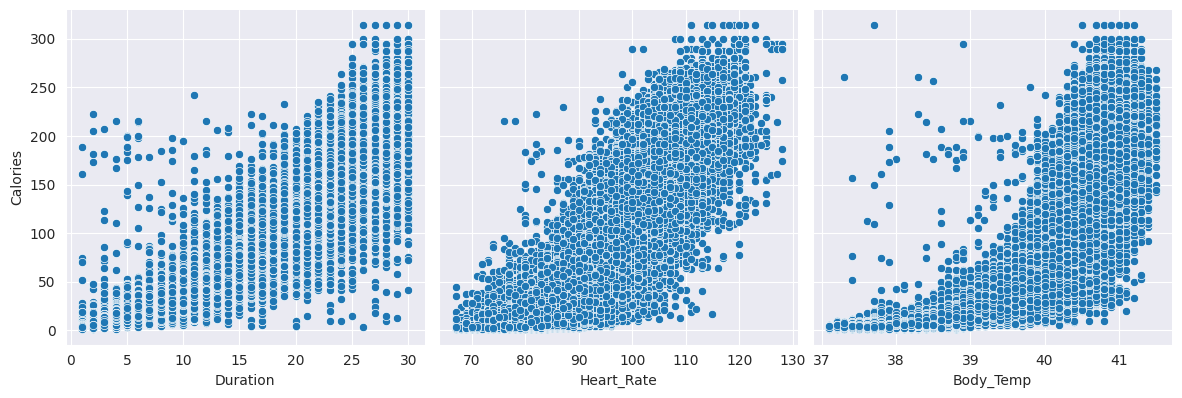

In [20]:
sns.pairplot(df, x_vars=['Duration', 'Heart_Rate', 'Body_Temp'], y_vars='Calories', kind='scatter', height=4)
plt.show()

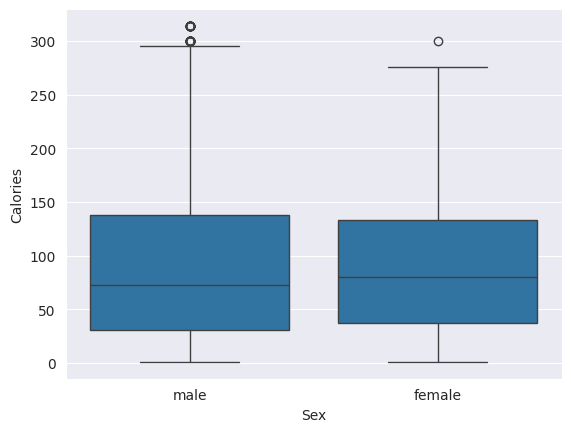

In [21]:
sns.boxplot(x='Sex', y='Calories', data=df)

plt.show()

In [22]:
df = pd.get_dummies(df, columns= ['Sex'], dtype=int, drop_first=True)

In [23]:
df.drop(['id'], axis=1, inplace=True)

In [24]:
df.head(2)

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,Sex_male
0,36,189.0,82.0,26.0,101.0,41.0,150.0,22.96,1
1,64,163.0,60.0,8.0,85.0,39.7,34.0,22.58,0


In [25]:
X = df.drop('Calories', axis=1)
y = df['Calories']

In [26]:
# Split the data into train and validation set
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression

In [27]:
# import Linear Regression
from sklearn.linear_model import LinearRegression

In [28]:
# instantiate a linear regression object

lr = LinearRegression()

In [29]:
# fit the model on the training data
lr.fit(X_train, y_train)

LinearRegression()

In [30]:
# predict the validation data using the trained model
pred = lr.predict(X_val)

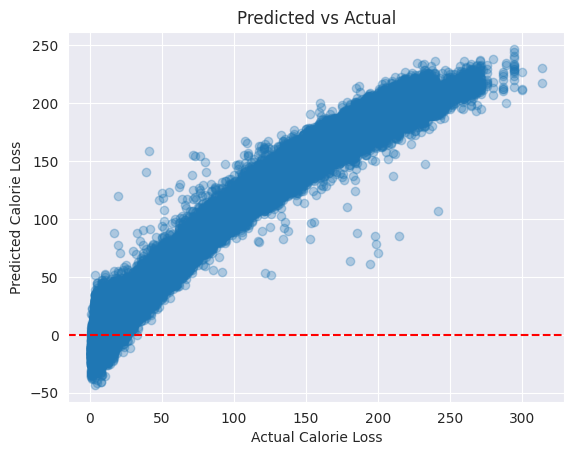

In [31]:
# Check the plot of the actual and the predicted calory loss

plt.scatter(y_val, pred, alpha=0.3)
plt.xlabel("Actual Calorie Loss")
plt.ylabel("Predicted Calorie Loss")
plt.title("Predicted vs Actual")
plt.axhline(0, color='red', linestyle='--')  # highlights 0 line
plt.show()


In [32]:
# checking for negatives
print("Min prediction:", pred.min())
print("How many < 0:", np.sum(pred < 0))

Min prediction: -43.21547219642673
How many < 0: 6964


In [33]:
# Clip the negative value to 0
lr_pred_clipped = np.clip(pred, 0, None)

In [34]:
# checking for negatives
print("Min prediction:", lr_pred_clipped.min())
print("How many < 0:", np.sum(lr_pred_clipped < 0))

Min prediction: 0.0
How many < 0: 0


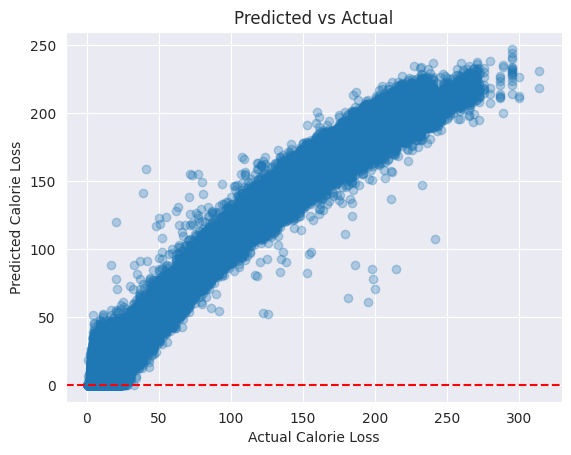

In [35]:
# Check the plot of the actual and the predicted calory loss

plt.scatter(y_val, lr_pred_clipped, alpha=0.3)
plt.xlabel("Actual Calorie Loss")
plt.ylabel("Predicted Calorie Loss")
plt.title("Predicted vs Actual")
plt.axhline(0, color='red', linestyle='--')  # highlights 0 line
plt.show()

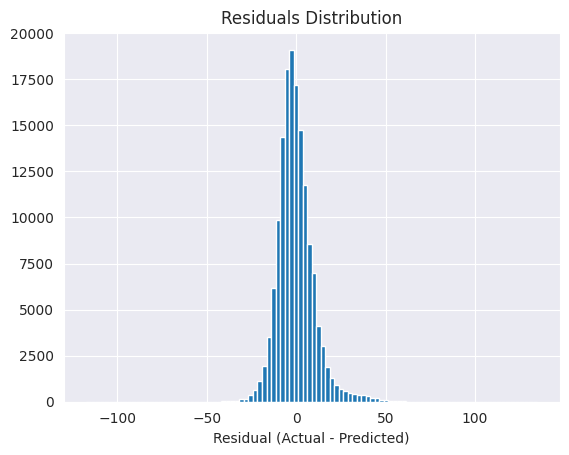

In [36]:
lr_residuals = y_val - lr_pred_clipped
plt.hist(lr_residuals, bins=100)
plt.title("Residuals Distribution")
plt.xlabel("Residual (Actual - Predicted)")
plt.show()

In [37]:
# prints the root mean squared log error
print(np.sqrt(mean_squared_log_error(y_val, lr_pred_clipped)))

0.566774572683853


# XGBRegressor

In [38]:
# Instantiate the XGBRegressor model

model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

model.fit(X_train, y_train) # fit the model to the training data

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [39]:
# predict the validation data
xgb_pred_0 = model.predict(X_val)

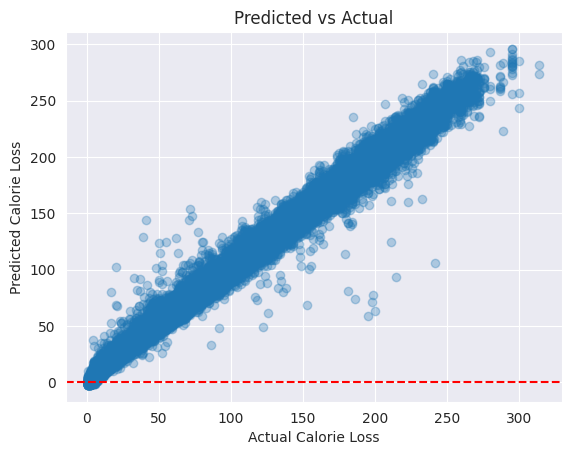

In [40]:
plt.scatter(y_val, xgb_pred_0, alpha=0.3)
plt.xlabel("Actual Calorie Loss")
plt.ylabel("Predicted Calorie Loss")
plt.title("Predicted vs Actual")
plt.axhline(0, color='red', linestyle='--')  # highlights 0 line
plt.show()


In [41]:
# checking for negatives
print("Min prediction:", xgb_pred_0.min())
print("How many < 0:", np.sum(xgb_pred_0 < 0))


Min prediction: -2.4146667
How many < 0: 344


In [42]:
# Clip negative predictions to zero
xgb_pred_clipped = np.clip(xgb_pred_0, 0, None)

In [43]:
# checking for negatives
print("Min prediction:", xgb_pred_clipped.min())
print("How many < 0:", np.sum(xgb_pred_clipped < 0))

Min prediction: 0.0
How many < 0: 0


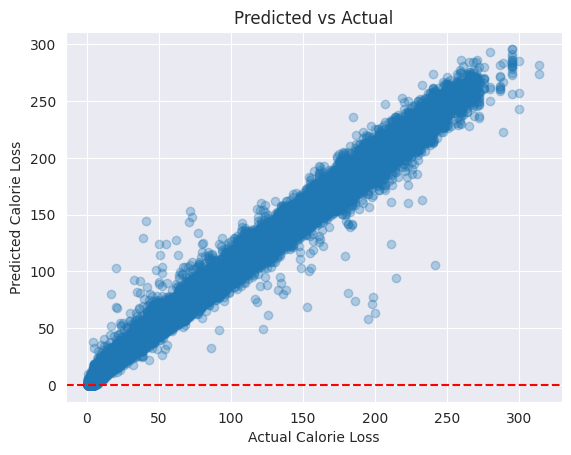

In [44]:
plt.scatter(y_val, xgb_pred_clipped, alpha=0.3)
plt.xlabel("Actual Calorie Loss")
plt.ylabel("Predicted Calorie Loss")
plt.title("Predicted vs Actual")
plt.axhline(0, color='red', linestyle='--')  # highlights 0 line
plt.show()

In [45]:
# RMSLE scorer (square root of MSLE)
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [46]:
# Checks the root mean squared log error
print(np.sqrt(mean_squared_log_error(y_val, xgb_pred_clipped)))

0.12928388490158768


In [47]:
rmsle(y_val, xgb_pred_clipped)

np.float64(0.12928388490158768)

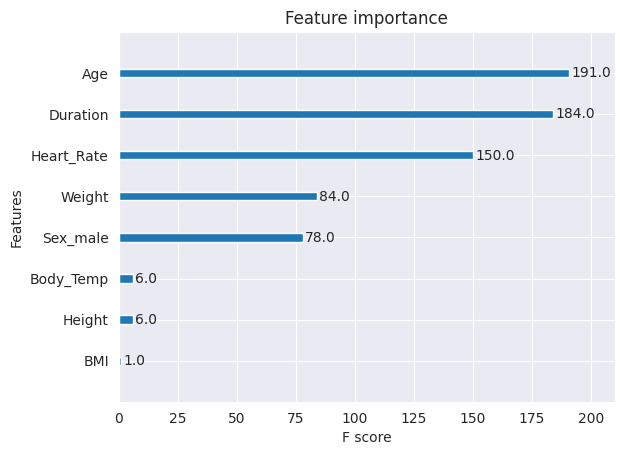

In [48]:
xgb.plot_importance(model)
plt.show()

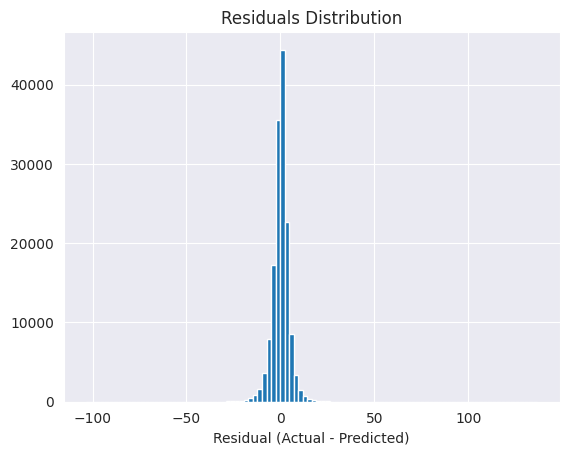

In [49]:
residuals = y_val - xgb_pred_0
plt.hist(residuals, bins=100)
plt.title("Residuals Distribution")
plt.xlabel("Residual (Actual - Predicted)")
plt.show()


In [50]:
# To check for Overfitting/Underfitting
from sklearn.metrics import r2_score

print("Train R²:", r2_score(y_train, model.predict(X_train)))
print("Test R² :", r2_score(y_val, xgb_pred_clipped))


Train R²: 0.9942889987889075
Test R² : 0.9942624350733648


HYPERPARAMETER TUNING

In [51]:
#Wrap it for use in RandomizedSearchCV
rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

In [52]:
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
}

In [53]:
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

search = GridSearchCV(model,
                      param_grid=param_grid,
                      cv=5,
                      verbose=1,
                      scoring=rmsle_scorer,
                      n_jobs=-1)
search.fit(X_train, y_train)

best_model = search.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [-0.14530459         nan         nan -0.0860505          nan         nan
 -0.07122328 -0.06257896         nan         nan         nan         nan
         nan         nan         nan -0.06380033         nan         nan]
  warnings.warn(


In [54]:
# Check the result of our GridSearchCV
cv_result = search.cv_results_
pd.DataFrame(cv_result).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.908480,0.458949,0.283536,0.091060,0.05,3,100,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",-0.146936,-0.144661,-0.143664,-0.144443,-0.146819,-0.145305,0.001327,5
1,11.991015,0.790585,0.774991,0.186007,0.05,3,300,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
2,18.430081,0.863164,1.132892,0.161182,0.05,3,500,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
3,8.415315,0.546195,0.554669,0.150702,0.05,5,100,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",-0.088118,-0.085240,-0.085178,-0.085756,-0.085960,-0.086051,0.001076,4
4,18.483701,0.519935,1.302785,0.115420,0.05,5,300,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",-0.074106,-0.076233,-0.073120,-0.073108,NaN,NaN,NaN,6


In [55]:
# check the best parameters
print("Best Params:", search.best_params_)

Best Params: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 300}


In [56]:
best_model.fit(X_train, y_train)
xgb_pred = best_model.predict(X_val)

In [57]:
print(np.sqrt(mean_squared_log_error(y_val, xgb_pred)))

0.06241051094997824


# Random Forest Regressor

In [58]:
forest = RandomForestRegressor(n_estimators=10, random_state=42)
forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [59]:
forest_pred = forest.predict(X_val)

In [60]:
print(rmsle(y_val, forest_pred))

0.0660581608399081


In [61]:
# Training Error
print(rmsle(y_train, forest.predict(X_train)))

0.029039562220741177


In [62]:
# checking for negatives
print("Min prediction:", forest_pred.min())
print("How many < 0:", np.sum(forest_pred < 0))

Min prediction: 1.0
How many < 0: 0


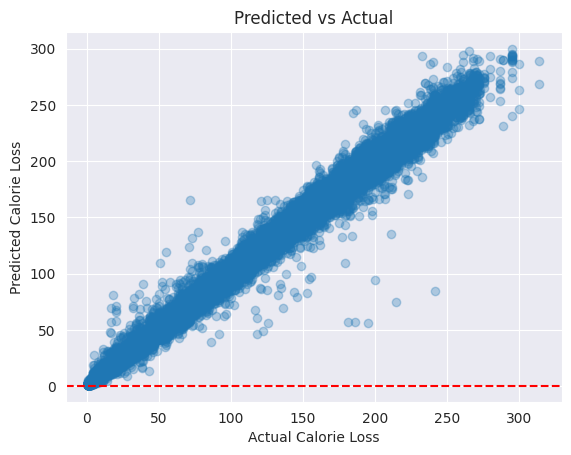

In [63]:
plt.scatter(y_val, forest_pred, alpha=0.3)
plt.xlabel("Actual Calorie Loss")
plt.ylabel("Predicted Calorie Loss")
plt.title("Predicted vs Actual")
plt.axhline(0, color='red', linestyle='--')  # highlights 0 line
plt.show()

# Saving Models

In [73]:
# Save the models

with open('lr_model.pkl', 'wb') as f:
    pickle.dump(lr, f)

with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

with open('forest_model.pkl', 'wb') as f:
    pickle.dump(forest, f)

In [74]:
from make_predictions import make_predictions

In [75]:
test_filepath = "test.csv"

In [76]:
test_predictions = make_predictions('forest_model.pkl', test_filepath)

In [77]:
test_predictions.head(3)

,id,Calories
0,750000,27.1
1,750001,107.7
2,750002,87.1


In [65]:
# # Create a function for making predictions
# def make_predictions(model, data_path):

#   df = pd.read_csv(data_path)

#   id = df['id'].values

#   df['BMI'] = (df['Weight'] / (df['Height']/100)**2).round(2)
#   df = pd.get_dummies(df, columns= ['Sex'], dtype=int, drop_first=True)
#   df.drop(['id'], axis=1, inplace=True)

#   with open(model, 'rb') as f:
#     model = pickle.load(f)

#   pred = model.predict(df)

#   pred = pd.DataFrame({
#       'id':id,
#       'Calories':pred
#   })

#   return pred